# Brightness and Contrast

When visualizing images in Jupyter notebooks it is important to show them in a way that a reader can see what we're writing about. Therefore, adjusting brightness and contrast is important. We can do this by modifying the _display range_, the range of displayed grey values.

For demonstration purposes we use the [cells3d example image of scikit-image](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cells3d).

In [14]:
import numpy as np
from skimage.data import cells3d
from skimage.io import imread
import stackview

The `cells3d` dataset is a 4D-image. Using array-acces we extract a single 2D slice and show it.

In [3]:
image = cells3d()[30,0]
image.shape

(256, 256)

StackViewNDArray([[4496, 5212, 6863, ..., 2917, 2680, 2642],
                  [4533, 5146, 7555, ..., 2843, 2857, 2748],
                  [4640, 6082, 8452, ..., 3372, 3039, 3128],
                  ...,
                  [1339, 1403, 1359, ..., 4458, 4314, 4795],
                  [1473, 1560, 1622, ..., 3967, 4531, 4204],
                  [1380, 1368, 1649, ..., 3091, 3558, 3682]], dtype=uint16)
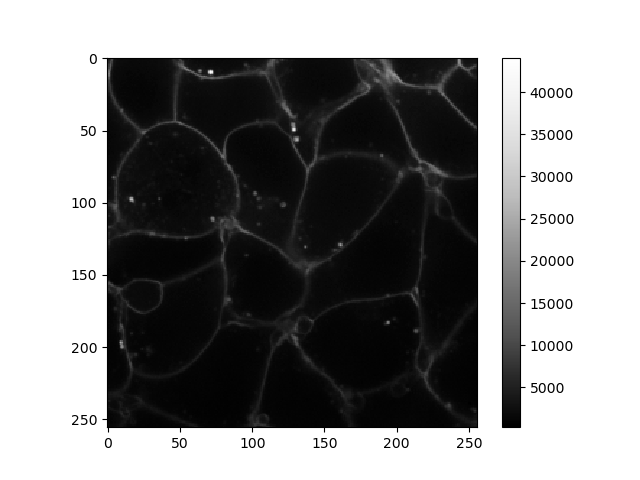
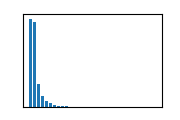

In [8]:
stackview.insight(image)

Notice that here the colorbar ranges from 0 to about 45000. Minimum and maxium intensity are also given on the right.

You can also tune minimum and maximum display intensity manually like this:

In [6]:
stackview.display_range(image)

For specifying a fixed maximum intensity for display, you can use the imshow function:

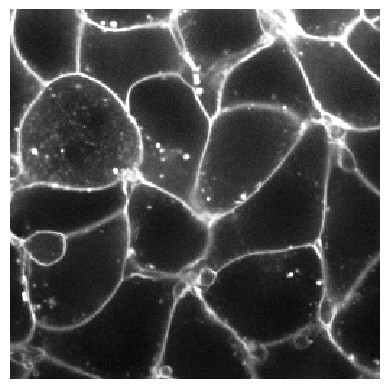

In [9]:
stackview.imshow(image, max_display_intensity=10000)

## Adjusting visualization independent from the specific image
The next image we open may, or may not, have a similar grey-value range. It makes sense to analyse the intensity distribution of the image. Percentiles are the way to go. E.g. the 95th percentile specifies the intensity threshold under which 95% of the image are. One could use this as an upper limit for display. This would also work for other images, where the intensity distribution is different.

In [10]:
upper_limit = np.percentile(image, 95)
upper_limit

6580.0

We can use this value to configure the display. Note the colorbar has a maximum of this value now. Hence, the pixels with intensity above this value may be shown wrongly.

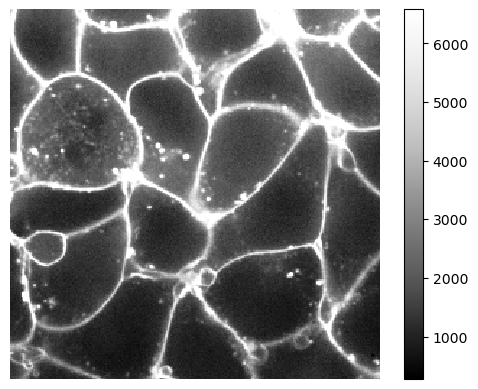

In [12]:
stackview.imshow(image, max_display_intensity=upper_limit, colorbar=True)

# Exercise

The `M51` dataset (taken from ImageJ's example images) is also an image that is hard to display correctly. After loading it, it is displayed like this:

StackViewNDArray([[218, 245, 235, ..., 296, 303, 279],
                  [254, 268, 267, ..., 269, 265, 254],
                  [266, 254, 255, ..., 269, 245, 248],
                  ...,
                  [251, 242, 242, ..., 197, 207, 205],
                  [250, 250, 240, ..., 210, 202, 203],
                  [233, 247, 248, ..., 203, 199, 203]], dtype=uint16)
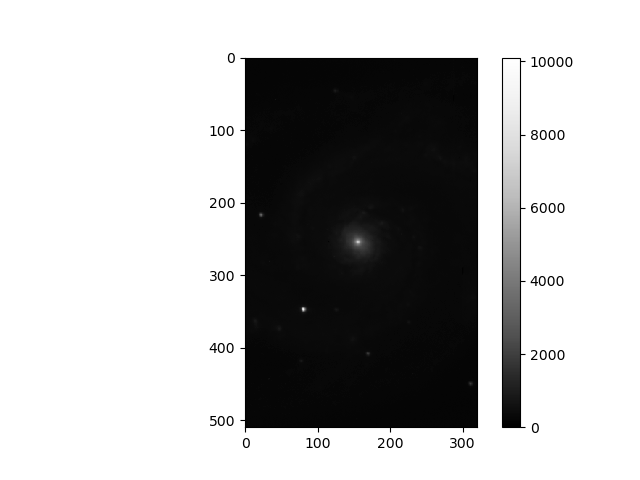
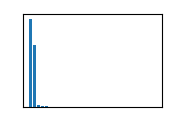

In [15]:
m51 = imread("../../data/m51.tif")

stackview.insight(m51)

Study the intensity distribution of the image and show it up to its 99th percentile.